# Loss

실수 값을 예측하는 regression 문제에서는 기본적으로 [MSE Loss](https://en.wikipedia.org/wiki/Mean_squared_error)가 자주 사용된다.

숫자의 대소관계가 없는 discrete한 숫자를 예측하는 경우, 즉, classification 문제에서는 

- binary classification : [Binary Cross Entropy](https://en.wikipedia.org/wiki/Cross_entropy)
- multinomial classification : [Categorical Cross Entropy](https://en.wikipedia.org/wiki/Cross_entropy)

를 주로 사용한다.

Categorical Cross Entropy를 사용하는 경우, y값을 [one-hot vector](https://en.wikipedia.org/wiki/One-hot)로 인코딩 하여 사용하는 것이 보편적이다.

$Loss >= 0$이어야 하며,

예측 값이 참값과 비슷한경우 Loss => 0으로 가야하며,

예측 값이 참값과 멀어지는 경우 Loss는 커져야 한다.

또한, Loss는 Convex 해야한다.

배치 학습을 진행하는 경우에는 Loss의 합 또는 평균값을 사용한다.

## 실습

### Dataset for regression

In [1]:
import torch

N, n_feature = 8, 5
weights = torch.tensor([1., 2., 3., 4., 5.])
bias = torch.tensor([10.])

X = torch.randn(N, n_feature)
Y = (weights * X).sum(axis = 1) + bias

print(f'X(shape/dtype/data) : {X.detach().numpy().shape} / {X.dtype}\n {X.detach().numpy()}\n')
print(f'Y(shape/dtype/data) : {Y.detach().numpy().shape} / {Y.dtype}\n {Y.detach().numpy()}\n')

X(shape/dtype/data) : (8, 5) / torch.float32
 [[-0.5327221  -0.12359268 -0.5920341  -0.05205629  1.3285662 ]
 [ 1.0616968   1.5383563   1.073248   -1.4870163  -0.45664966]
 [ 0.34169066 -0.6548304  -0.8853236  -1.6216094  -1.0614848 ]
 [-1.167248   -0.19444533 -2.230667   -0.8904372   0.08879463]
 [ 2.0935056   0.5482115  -0.2926828  -0.7631139   1.2719749 ]
 [ 0.5872485  -1.1575139  -0.10281583 -0.37403464 -0.182116  ]
 [-1.0731848  -0.22421665 -0.12822816 -1.2793843  -1.9723185 ]
 [-2.0195403  -1.308681   -0.36187592  1.056473    0.9218636 ]]

Y(shape/dtype/data) : (8,) / torch.float32
 [13.878596   9.126841  -5.417803  -1.3659153 15.619299   5.5570545
 -6.8854313 13.11268  ]



### Dataset for Binary Classification

In [3]:
import torch

N, n_feature = 8, 5
weights = torch.tensor([1., 2., 3., 4., 5.])
bias = torch.tensor([10.])

X = torch.randn(N, n_feature)
Y = (weights * X).sum(axis = 1) + bias
Y = (Y > 5).type(torch.int32)

print(f'X(shape/dtype/data) : {X.detach().numpy().shape} / {X.dtype}\n {X.detach().numpy()}\n')
print(f'Y(shape/dtype/data) : {Y.detach().numpy().shape} / {Y.dtype}\n {Y.detach().numpy()}\n')

X(shape/dtype/data) : (8, 5) / torch.float32
 [[-1.9435873e+00 -1.6491245e-02  5.8313811e-01  1.2796857e+00
  -1.3205603e+00]
 [ 3.8631055e-01 -9.4718570e-01 -3.9839754e-01  7.6628077e-01
   1.8268689e+00]
 [-6.0133767e-01  1.5377073e+00  1.5631926e+00  9.3582046e-01
   9.3441671e-01]
 [-2.0480359e+00 -1.0246760e+00  8.3868641e-01 -5.0401086e-01
  -1.8964161e-01]
 [-2.2792079e-01 -2.5042123e-01  2.3548926e-01  5.7812816e-01
  -5.7953554e-01]
 [-2.0163121e+00 -1.0224595e+00 -3.9064199e-01 -6.9584972e-01
  -2.0884068e-03]
 [-6.1258417e-01 -2.7522087e+00  6.6990912e-01  7.2512448e-01
   2.5117522e-01]
 [-1.6543512e+00 -3.6817801e-01  2.2704382e-01  8.4860158e-01
   1.3094676e+00]]

Y(shape/dtype/data) : (8,) / torch.int32
 [1 1 1 1 1 0 1 1]



### Dataset for Multi-class Classification

X(shape/dtype/data) : (24, 2) / torch.float32
 [[ 0.22465068  6.742824  ]
 [ 1.8510637   2.6611643 ]
 [ 2.5035372   6.4695415 ]
 [ 1.1824615   4.9623237 ]
 [ 1.4915082   4.327526  ]
 [ 0.8964809   6.103132  ]
 [ 2.5343323   5.4579334 ]
 [ 0.5439893   5.5078692 ]
 [ 9.484358    8.644683  ]
 [11.321846    9.491784  ]
 [12.182148    8.786864  ]
 [12.389651    9.486388  ]
 [13.025801   11.241271  ]
 [13.041826    9.194061  ]
 [11.556921    8.049114  ]
 [11.956268    9.295376  ]
 [ 6.7767477   5.8525257 ]
 [ 5.1980786   3.1798325 ]
 [ 6.078248    2.0300303 ]
 [ 3.0835257   3.1476758 ]
 [ 7.016579    4.265204  ]
 [ 3.4944658   1.5506024 ]
 [ 6.8111105   4.719006  ]
 [ 6.6825666   2.3156538 ]]

Y(shape/dtype/data) : (24, 1) / torch.float32
 [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]]



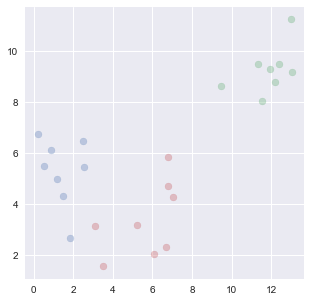

In [9]:
import torch
import matplotlib.pyplot as plt

plt.style.use('seaborn')

N, n_feature  = 8, 2
n_class = 3

X = torch.zeros(0, n_feature)
Y = torch.zeros(0, 1)

fig, ax = plt.subplots(figsize = (5, 5))
for class_idx in range(n_class):
    center = torch.rand(size = (2, )) * 15
    
    x1 = center[0] + torch.randn(N, 1)
    x2 = center[1] + torch.randn(N, 1)
    
    x = torch.cat((x1, x2), dim = 1)
    y = class_idx * torch.ones(N, 1)
    ax.scatter(x[:, 0].numpy(), x[:, 1].numpy(), alpha = 0.3)
    
    X = torch.cat((X, x), dim = 0)
    Y = torch.cat((Y, y), dim = 0)
    
print(f'X(shape/dtype/data) : {X.detach().numpy().shape} / {X.dtype}\n {X.detach().numpy()}\n')
print(f'Y(shape/dtype/data) : {Y.detach().numpy().shape} / {Y.dtype}\n {Y.detach().numpy()}\n')

### Dataset for Multi-class classification with one-hot Encoding

X(shape/dtype/data) : (24, 2) / torch.float32
 [[ 1.67941895e+01  1.36607707e-01]
 [ 1.57275505e+01 -2.26020336e-01]
 [ 1.53952188e+01 -1.46739423e-01]
 [ 1.46828098e+01  1.70793712e-01]
 [ 1.38543482e+01 -1.26526356e-01]
 [ 1.54042740e+01  1.32082075e-01]
 [ 1.45825815e+01 -1.08458877e-01]
 [ 1.51421366e+01  9.66588259e-01]
 [-1.31023645e+00 -4.14650679e-01]
 [-6.11082673e-01  2.03664923e+00]
 [ 1.99301386e+00  1.77180707e+00]
 [-1.24538493e+00  3.40715814e+00]
 [ 1.00094378e-02  1.99961007e+00]
 [ 6.91124678e-01  1.67828608e+00]
 [-2.91222572e+00 -1.12814069e+00]
 [-1.35517454e+00  2.29739833e+00]
 [ 8.27764797e+00  1.32098465e+01]
 [ 7.64402628e+00  1.23029242e+01]
 [ 7.19018412e+00  1.24335470e+01]
 [ 7.48238516e+00  1.38017778e+01]
 [ 7.95364237e+00  1.30552301e+01]
 [ 8.29765892e+00  1.30802088e+01]
 [ 7.52586889e+00  1.23606319e+01]
 [ 8.78200054e+00  1.13979492e+01]]

Y(shape/dtype/data) : (24, 3) / torch.int64
 [[1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1

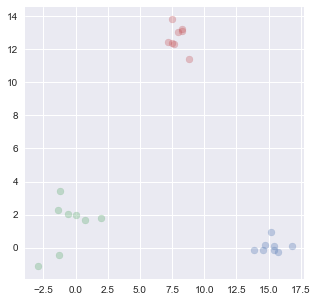

In [21]:
import torch
import matplotlib.pyplot as plt

plt.style.use('seaborn')

N, n_feature  = 8, 2
n_class = 3

X = torch.zeros(0, n_feature)
Y = torch.zeros(0, 1)

fig, ax = plt.subplots(figsize = (5, 5))
for class_idx in range(n_class):
    center = torch.rand(size = (2, )) * 15
    
    x1 = center[0] + torch.randn(N, 1)
    x2 = center[1] + torch.randn(N, 1)
    
    x = torch.cat((x1, x2), dim = 1)
    y = class_idx * torch.ones(N, 1)
    ax.scatter(x[:, 0].numpy(), x[:, 1].numpy(), alpha = 0.3)
    
    X = torch.cat((X, x), dim = 0)
    Y = torch.cat((Y, y), dim = 0)

Y = Y.view(-1)
Y = torch.nn.functional.one_hot(Y.type(torch.int64), num_classes = n_class)
    
print(f'X(shape/dtype/data) : {X.detach().numpy().shape} / {X.dtype}\n {X.detach().numpy()}\n')
print(f'Y(shape/dtype/data) : {Y.detach().numpy().shape} / {Y.dtype}\n {Y.detach().numpy()}\n')

### Dataset objects

In [26]:
import torch
from torch.utils.data import TensorDataset, DataLoader

N, n_feature = 100, 5
batch_size = 32

weights = torch.tensor([1., 2., 3., 4., 5.])
bias = torch.tensor([10.])

X = torch.randn(N, n_feature)
Y = (weights * X).sum(axis = 1) + bias

dataset = TensorDataset(X, Y)
dataloader = DataLoader(dataset, batch_size = batch_size, shuffle = True)
        
for x, y in dataloader:
    print(x.shape, y.shape)

torch.Size([32, 5]) torch.Size([32])
torch.Size([32, 5]) torch.Size([32])
torch.Size([32, 5]) torch.Size([32])
torch.Size([4, 5]) torch.Size([4])


### MSE Calculation

In [28]:
import torch

loss = torch.nn.MSELoss()

batch_size = 32
predictions = torch.randn(batch_size, 1)
labels = torch.randn(batch_size, 1)

mse = loss(labels, predictions)
mse_manual = torch.pow(labels - predictions, 2).mean()


print("MSE(Pytorch): ", mse.detach().numpy())
print("MSE(Manual): ", mse_manual.detach().numpy())

MSE(Pytorch):  1.025732
MSE(Manual):  1.025732


### MSE with Model/Dataset

In [31]:
import torch

N, n_feature = 100, 5
batch_size = 32

X = torch.randn(N, n_feature)
Y = torch.randn(N, 1)

dataset = torch.utils.data.TensorDataset(X, Y)
dataloader = torch.utils.data.DataLoader(dataset, batch_size = batch_size)

model = torch.nn.Linear(5, 1)
loss_function = torch.nn.MSELoss()

for x, y in dataloader:
    predictions = model(x)
    loss = loss_function(predictions, y)
    print(loss.detach().numpy())

1.6066357
0.8785365
1.701092
1.9728367


### Binary Classification

In [35]:
import torch

batch_size = 32
n_class = 2

predictions = torch.rand(batch_size, 1)
labels = torch.rand(batch_size, 1)

loss_function = torch.nn.BCELoss()
loss = loss_function(labels, predictions)

bce_man = -(labels * predictions.log() + (1 - labels) * (1 - predictions).log())
bce_man = bce_man.mean()

print("BCE(Pytorch): ", loss.detach().numpy())
print("BCE(Manual): ", bce_man.detach().numpy())

BCE(Pytorch):  0.87177426
BCE(Manual):  0.89360183


### BCE with Model/Dataset

In [48]:
import torch

N, n_feature = 100, 5
weights = torch.tensor([1., 2., 3., 4., 5.])
bias = torch.tensor([10.])

X = torch.randn(N, n_feature)
Y = (weights * X).sum(axis = 1) + bias
Y = (Y > 5).type(torch.float32)

dataset = torch.utils.data.TensorDataset(X, Y)
dataloader = torch.utils.data.DataLoader(dataset, batch_size = 32)

model = torch.nn.Linear(n_feature, 1)
sigmoid = torch.nn.Sigmoid()
loss_function = torch.nn.BCELoss()

for x, y in dataloader:
    z = model(x)
    predictions = sigmoid(z)
    loss = loss_function(predictions.view(-1), y)
    print(loss.detach().numpy())

0.74942636
0.7903834
0.81817937
0.40927923


### CCE Calculation

In [72]:
import torch

batch_size, n_class = 16, 5

predictions = torch.rand(batch_size, n_class)
pred_sum = predictions.sum(axis = 1).view(-1, 1)
predictions /= pred_sum

labels = torch.rand(batch_size) * n_class
labels = labels.type(torch.int64)

loss_function = torch.nn.CrossEntropyLoss()
loss = loss_function(predictions, labels)

print("CCE(Pytorch): ", loss.detach().numpy())

labels = labels.view(-1)
labels = torch.nn.functional.one_hot(labels, num_classes = n_class)
cce_man = (-labels * predictions.log()).sum(axis = 1).mean()
print("CCE(Manual): ", cce_man.detach().numpy())

CCE(Pytorch):  1.6155267
CCE(Manual):  1.8610663


파이토치의 cross entropy loss는 target이 1-dimension이어야 하며, long타입(int64)이어야 한다.

onehot vector로 주어지지 않도록 주의한다.

### CCE with Model/Dataset

1.6518369
1.7254292


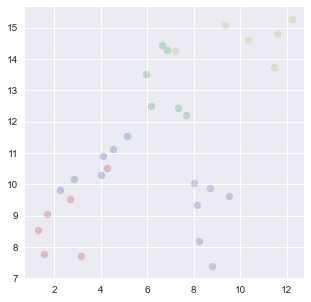

In [81]:
import torch

N, n_feature  = 6, 2
n_class = 5

X = torch.zeros(0, n_feature)
Y = torch.zeros(0, 1)

fig, ax = plt.subplots(figsize = (5, 5))
for class_idx in range(n_class):
    center = torch.rand(size = (2, )) * 15
    
    x1 = center[0] + torch.randn(N, 1)
    x2 = center[1] + torch.randn(N, 1)
    
    x = torch.cat((x1, x2), dim = 1)
    y = class_idx * torch.ones(N, 1)
    ax.scatter(x[:, 0].numpy(), x[:, 1].numpy(), alpha = 0.3)
    
    X = torch.cat((X, x), dim = 0)
    Y = torch.cat((Y, y), dim = 0)

Y = Y.view(-1)
Y = Y.type(torch.int64)
dataset = torch.utils.data.TensorDataset(X, Y)
dataloader = torch.utils.data.DataLoader(dataset, batch_size = batch_size)

model = torch.nn.Linear(n_feature, n_class)
softmax = torch.nn.Softmax(dim = 1)
loss_function = torch.nn.CrossEntropyLoss()

for x, y in dataloader:
    z = model(x)
    predictions = softmax(z)
    loss = loss_function(predictions, y)
    print(loss.detach().numpy())